In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import matplotlib.lines as mlines
import pandas as pd
import numpy as np
import utils

In [2]:
rounds = [3, 5, 10, 20, 30, 50, 100, 200]
accuracy_b10 = [0.971, 0.980, 0.987, 0.989, 0.988, 0.991, 0.990, 0.991]
accuracy_b100 = [0.284, 0.723, 0.897, 0.945, 0.963, 0.975, 0.985, 0.988]
loss_b10 = [27.337, 20.213, 12.810, 10.031, 11.277, 9.789, 12.926, 16.055]
loss_b100 = [711.017, 395.744, 108.574, 55.315, 38.149, 24.616, 14.756, 11.597]

# Create DataFrame
df_baseline = pd.DataFrame({
    "rounds": rounds,
    "accuracy": accuracy_b10,
    "loss": loss_b10,
    "accuracy_2": accuracy_b100,
    "loss_2": loss_b100
})

accuracy_r10 = [0.963, 0.975, 0.981, 0.988, 0.989, 0.990, 0.991, 0.992]
accuracy_r100 = accuracy = [0.124, 0.797, 0.877, 0.948, 0.960, 0.976, 0.984, 0.988]
loss_r10 = [34.889, 23.173, 17.794, 12.197, 10.802, 11.348, 13.286, 14.573]
loss_r100 = [711.162, 214.996, 129.743, 53.364, 38.921, 23.804, 15.962, 10.877]

df_realistic_sim = pd.DataFrame({
    "rounds": rounds,
    "accuracy": accuracy_r10,
    "loss": loss_r10,
    "accuracy_2": accuracy_r100,
    "loss_2": loss_r100
})

df_combined = pd.DataFrame({
    "rounds": rounds,
    "accuracy": accuracy_b10,
    "loss": loss_b10,
    "accuracy_2": accuracy_b100,
    "loss_2": loss_b100,
    "accuracy_3": accuracy_r10,
    "loss_3": loss_r10,
    "accuracy_4": accuracy_r100,
    "loss_4": loss_r100
})

In [3]:

# Plotting
def plot_four_loss_and_accuracy_sets(df, title):
    _, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()

    # Loss lines
    ax1.plot(df["rounds"], df["loss"], marker="s", color="tab:red", label="Loss (Base 10 Clients)")
    ax1.plot(df["rounds"], df["loss_2"], marker="s", linestyle="--", color="tab:orange", label="Loss (Base 100 Clients)")
    ax1.plot(df["rounds"], df["loss_3"], marker="s", color="tab:blue", label="Loss (Realistic 10 Clients)")
    ax1.plot(df["rounds"], df["loss_4"], marker="s", linestyle="--", color="tab:green", label="Loss (Realistic 100 Clients)")

    # Accuracy lines
    ax2.plot(df["rounds"], df["accuracy"], marker="x", color="tab:red", label="Accuracy (10 Clients)")
    ax2.plot(df["rounds"], df["accuracy_2"], marker="x", linestyle="--", color="tab:orange", label="Accuracy (100 Clients)")
    ax2.plot(df["rounds"], df["accuracy_3"], marker="x", color="tab:blue", label="Accuracy (10 Clients)")
    ax2.plot(df["rounds"], df["accuracy_4"], marker="x", linestyle="--", color="tab:green", label="Accuracy (100 Clients)")

    ax1.set_xlabel("Rounds")
    ax1.set_ylabel("Loss", color="black")
    ax2.set_ylabel("Accuracy", color="black")

    # Combine legends from both axes
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="center right")
    test_legend = mlines.Line2D([], [], color='none', label='100 Rounds Train Time (seconds)\nConfig    - 10   vs. 100 Clients\nBaseline - 610 vs. 774 \nRealistic - 416 vs. 394')

    # Add the artificial legend
    ax2.legend(handles=[test_legend], loc='center')

    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


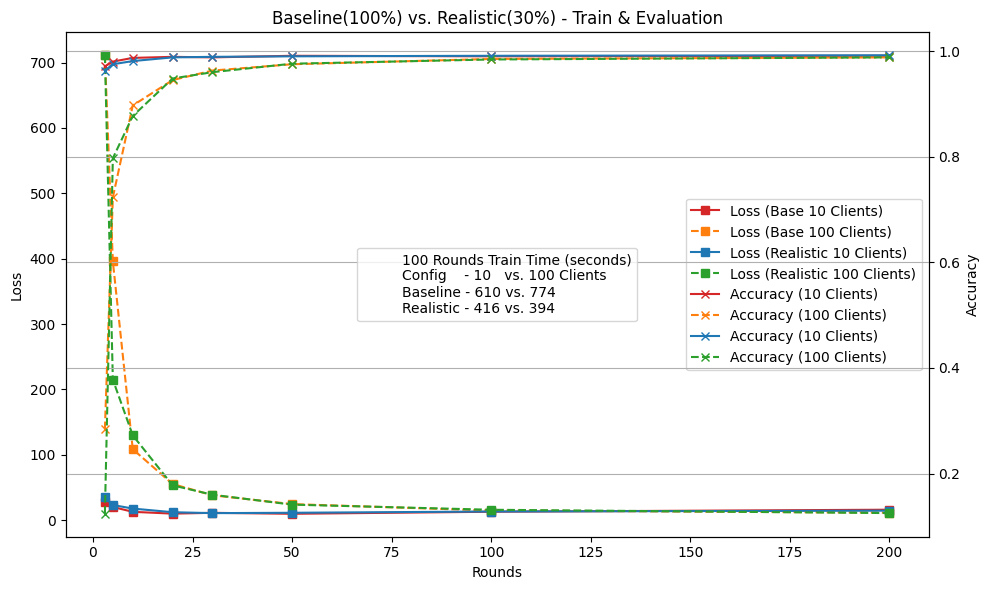

In [4]:
# Call the function
plot_four_loss_and_accuracy_sets(df_combined, "Baseline(100%) vs. Realistic(30%) - Train & Evaluation")

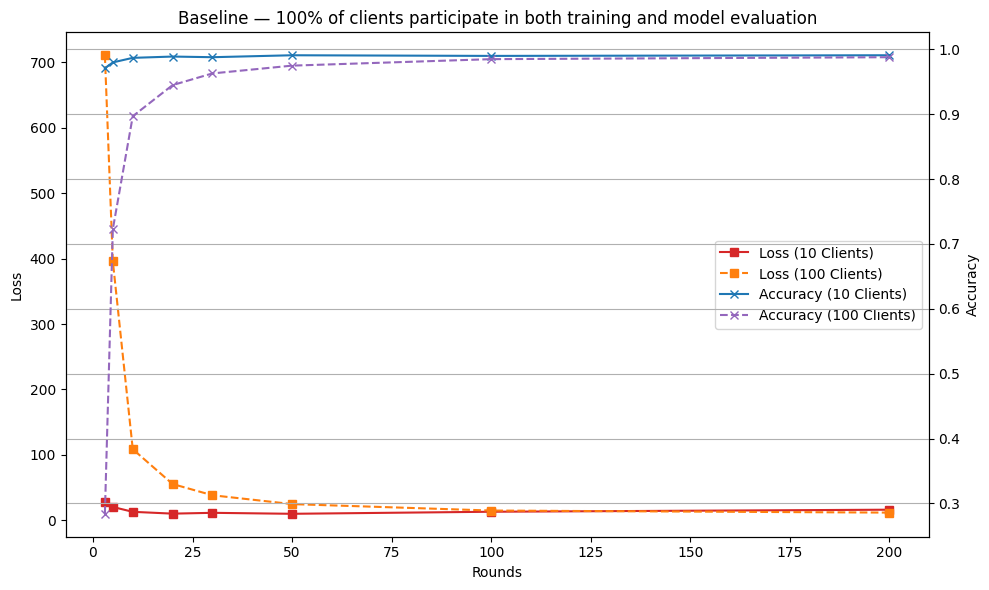

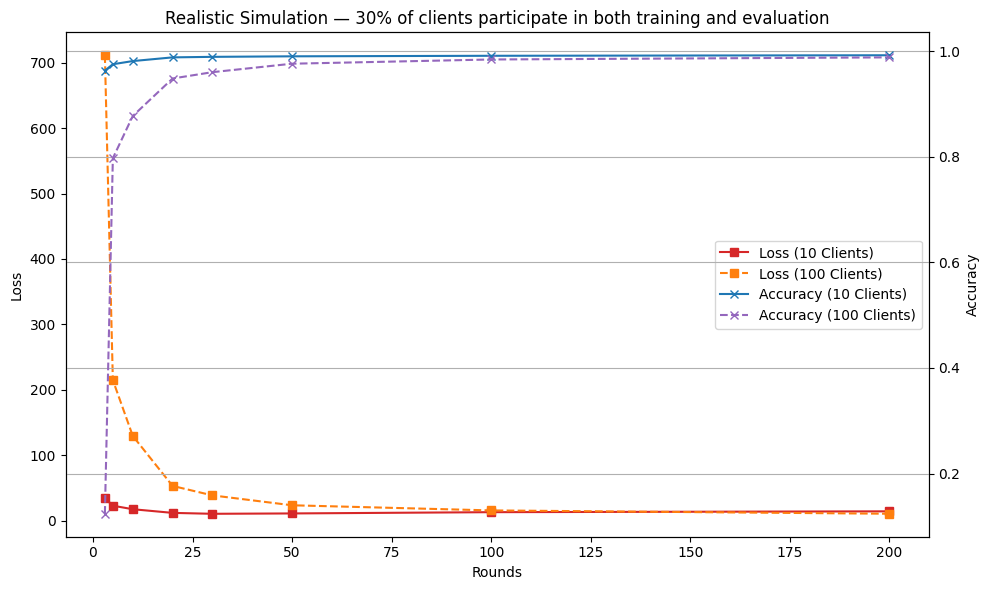

In [5]:
# Plotting
def plot_two_loss_and_accuracy_sets(df, title):
    _, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()

    # Loss lines
    ax1.plot(df["rounds"], df["loss"], marker="s", color="tab:red", label="Loss (10 Clients)")
    ax1.plot(df["rounds"], df["loss_2"], marker="s", linestyle="--", color="tab:orange", label="Loss (100 Clients)")

    # Accuracy lines
    ax2.plot(df["rounds"], df["accuracy"], marker="x", color="tab:blue", label="Accuracy (10 Clients)")
    ax2.plot(df["rounds"], df["accuracy_2"], marker="x", linestyle="--", color="tab:purple", label="Accuracy (100 Clients)")

    ax1.set_xlabel("Rounds")
    ax1.set_ylabel("Loss", color="black")
    ax2.set_ylabel("Accuracy", color="black")

    # Combine legends from both axes
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="center right")

    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function
plot_two_loss_and_accuracy_sets(df_baseline, "Baseline — 100% of clients participate in both training and model evaluation")
plot_two_loss_and_accuracy_sets(df_realistic_sim, "Realistic Simulation — 30% of clients participate in both training and evaluation" )

